Analyzing the woorld GDP

In [1]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium

Web Scraping the Table

In [5]:
# URL of the website
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

In [6]:
# Fetching the raw HTML content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
# Finding the target table
table = soup.find('table', {'class': 'wikitable'})

In [11]:
# Extracting the table headers
headers = [th.get_text(strip=True) for th in table.find_all('th')]

# Extracting table rows
rows = []
for tr in table.find_all('tr')[1:]:
    cells = tr.find_all(['td', 'th'])
    row = [cell.get_text(strip=True) for cell in cells]
    if len(row) < len(headers):
        row.extend([None] * (len(headers) - len(row)))
    rows.append(row)

In [13]:
# Creating a DataFrame
df = pd.DataFrame(rows, columns=headers)
df.head()

,Country/Territory,IMF[1][13],World Bank[14],United Nations[15],Forecast,Year,Estimate,Year,Estimate,Year
0,Forecast,Year,Estimate,Year,Estimate,Year,None,None,None,None
1,World,"110,047,109",2024,"105,435,540",2023,"100,834,796",2022,None,None,None
2,United States,"29,167,779",2024,"27,360,935",2023,"25,744,100",2022,None,None,None
3,China,"18,273,357",[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022,None,None,None
4,Germany,"4,710,032",2024,"4,456,081",2023,"4,076,923",2022,None,None,None


In [14]:
df.shape

(211, 10)

In [15]:
# Checking for missing values
df.isnull().sum()

,0
Country/Territory,0
IMF[1][13],0
World Bank[14],0
United Nations[15],0
Forecast,0
Year,5
Estimate,20
Year,211
Estimate,211
Year,211


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country/Territory   211 non-null    object
 1   IMF[1][13]          211 non-null    object
 2   World Bank[14]      211 non-null    object
 3   United Nations[15]  211 non-null    object
 4   Forecast            211 non-null    object
 5   Year                206 non-null    object
 6   Estimate            191 non-null    object
 7   Year                0 non-null      object
 8   Estimate            0 non-null      object
 9   Year                0 non-null      object
dtypes: object(10)
memory usage: 16.6+ KB


Data Cleaning

In [18]:
# renaming the first three columns
df.rename(columns={df.columns[0]: 'Country', df.columns[1]: 'GDP (US$ Millions)', df.columns[2]: 'Year'}, inplace=True)


In [19]:
# Removing special characters
df['Country'] = df['Country'].str.replace(r'\[.*\]', '', regex=True)

# Convert GDP to numeric
df['GDP (US$ Millions)'] = pd.to_numeric(df['GDP (US$ Millions)'].str.replace(',', ''), errors='coerce')

In [20]:
# Droping rows with missing GDP values
df.dropna(subset=['GDP (US$ Millions)'], inplace=True)

In [21]:
# Reseting index
df.reset_index(drop=True, inplace=True)

Exploratory Data Analysis (EDA)

In [22]:
# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       GDP (US$ Millions)
count        1.950000e+02
mean         1.128700e+06
std          8.239994e+06
min          6.600000e+01
25%          1.335050e+04
50%          4.714700e+04
75%          2.977925e+05
max          1.100471e+08


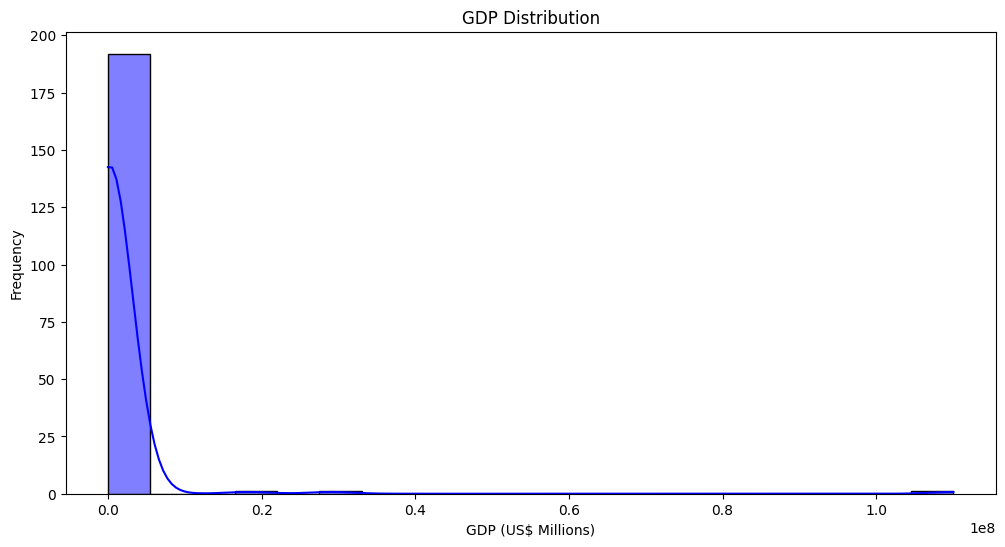

In [23]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['GDP (US$ Millions)'], kde=True, bins=20, color='blue')
plt.title('GDP Distribution')
plt.xlabel('GDP (US$ Millions)')
plt.ylabel('Frequency')
plt.show()

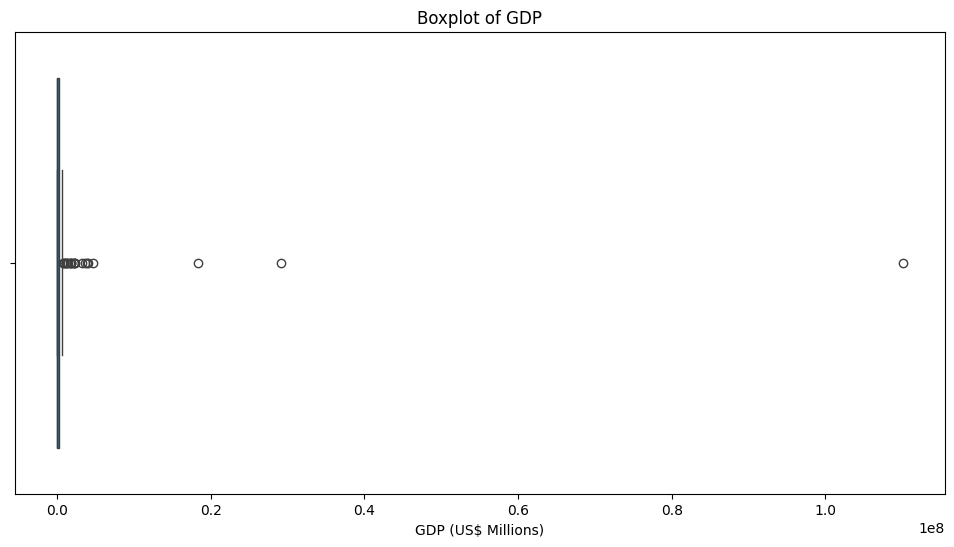

In [24]:
# Bivariate Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='GDP (US$ Millions)')
plt.title('Boxplot of GDP')
plt.show()

In [27]:
!pip install pycountry
import plotly.express as px
import pycountry

# Converting country names to ISO Alpha-3 country codes (eg. NGA, ENG, USA)
def get_country_code(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

# Adding ISO Alpha-3 country codes to the DataFrame
df['ISO_Code'] = df['Country'].apply(get_country_code)

# Dropping the rows with missing ISO codes
df = df.dropna(subset=['ISO_Code'])

# Create a choropleth map using Plotly
fig = px.choropleth(
    df,
    locations='ISO_Code',  # Use ISO Alpha-3 codes for mapping
    color='GDP (US$ Millions)',  # Color by GDP
    hover_name='Country',  # Display country name on hover
    title='World GDP Distribution',
    color_continuous_scale=px.colors.sequential.Plasma
)

# Display the map
fig.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.1 MB/s eta 0:00:00


CONCLUSION
1. The United States and China dominate the global GDP ranking.
2. Significant disparities exist among regions and countries.

RECOMMENDATION

Further studies is needed in order to analyze GDP growth trends and their underlying factors.